## 1.1

The KLR model is given as \
$$ P(y_i = 1) = \frac{1}{1 + e^{-\bf{w}^T \bf{\phi}(\bf{x}_i)}} $$

## 1.2.2 Gradient descent Algorithm for the KLR model

In [1]:
##########################################
## The gradient descent algorithm for the KLR model
##########################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

# Generate a random binary classification dataset
X, y = make_classification(
    n_samples = 1000, # number of samples
    n_features = 2, # number of features
    n_informative = 2, # number of useful features
    n_classes = 2, # number of classes (or labels)
    n_redundant = 0, # number of redundant features
    random_state = 0 # fix random seed to get the same result
    )

# Define the probability p(y_i = 1) = p(x_i)
def p(z):
    return 1 / (1 + np.exp(-z))

# Define the feature map
def x_phi(X, k):
    poly = PolynomialFeatures(degree = k, interaction_only = False, include_bias = True)
    return poly.fit_transform(X)

# Define the gradient of the given KLR's Cross Entropy function
def grad_gradient(X, y, w, s):
    m = X.shape[0]
    h = p(w.T.dot((x_phi(X, s)).T))
    grad = (1 / m) * (h - y).dot((x_phi(X, s)))
    return grad

# Initialize the weights to zeros
w = np.zeros((x_phi(X, 2).shape[1]))

# Set the step size and number of iterations
gamma = 0.01
num_iters = 100000

# Run method to get the weights
for i in range(num_iters):
    grad = grad_gradient(X, y, w, 2)
    w = w - gamma * grad
    
grad_w = w

## 1.2.2 Kernel Method Algorithm for the KLR model

In [2]:
# Define the gradient of the given KLR's Cross Entropy function
def kernel_gradient(K, y, alpha):
    m = K.shape[0] 
    h2 = p(alpha.dot(K))
    grad1 = (1 / m) * (h2 - y)
    return grad1

n = x_phi(X, 2).shape[0]

# Initialize the alpha to zero
alpha = np.zeros(n)

# Initialize the kernel matrix 
K = np.zeros((n, n))

# Calculate the kernel matrix
K = np.dot(x_phi(X, 2), x_phi(X, 2).T)

# Run method to get the weights
for i in range(num_iters):
    grad = kernel_gradient(K, y, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X, 2))
    
ker_w = w

In [3]:
print(grad_w[-1], ker_w[-1])

0.2971861116604524 0.2971861116604324


## 1.2.4 Verify that the two algorithms give the same results. 
That is, accuracy(grad_pred) $\equiv$ accuracy(ker_pred).

In [4]:
# Make predictions on the testing set
# round to the nearest integer
y_grad_pred = np.round(p(x_phi(X, 2).dot(grad_w)))
y_ker_pred = np.round(p(x_phi(X, 2).dot(ker_w)))

# Calculate the accuracy of the model
grad_accuracy = accuracy_score(y, y_grad_pred)
ker_accuracy = accuracy_score(y, y_ker_pred)
print("Gradient Descent Accuracy:", grad_accuracy)
print("Kernel Method Accuracy", ker_accuracy)

Gradient Descent Accuracy: 0.966
Kernel Method Accuracy 0.966


## 1.2.5

Two Interleaving half circles: \
Test the algorithm in the datasets (make_moons and make_circles) generated below using different kernels.\
##### I will be using kernels 3, 4, 5.

In [5]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(noise = 0.352, random_state = 42, n_samples = 1000)

#################################
## Kernel (poly_degree = 3)
#################################

num_iters2 = 100000

#################################
## Gradient Descent Method
w3_moon = np.zeros((x_phi(X_moon, 3).shape[1]))
for i in range(num_iters2):
    grad = grad_gradient(X_moon, y_moon, w3_moon, 3)
    w3_moon = w3_moon - gamma * grad

grad_w3_moon = w3_moon

#################################
## Kernel Method
n = x_phi(X_moon, 3).shape[0]
alpha = np.zeros(n)
K = np.zeros((n, n))

K = np.dot(x_phi(X_moon, 3), x_phi(X_moon, 3).T)

# Run method to get the weights
for i in range(num_iters2):
    grad = kernel_gradient(K, y_moon, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X_moon, 3))
    
ker_w3_moon = w
#################################

In [6]:
#################################
## Kernel (poly_degree = 4)
#################################

## Gradient Descent Method
w4_moon = np.zeros((x_phi(X_moon, 4).shape[1]))
for i in range(num_iters2):
    grad = grad_gradient(X_moon, y_moon, w4_moon, 4)
    w4_moon = w4_moon - gamma * grad

grad_w4_moon = w4_moon

#################################
## Kernel Method
n = x_phi(X_moon, 4).shape[0]
alpha = np.zeros(n)
K = np.zeros((n, n))

K = np.dot(x_phi(X_moon, 4), x_phi(X_moon, 4).T)

# Run method to get the weights
for i in range(num_iters2):
    grad = kernel_gradient(K, y_moon, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X_moon, 4))
    
ker_w4_moon = w
#################################

In [7]:
#################################
## Kernel (poly_degree = 5)
#################################

## Gradient Descent Method
w5_moon = np.zeros((x_phi(X_moon, 5).shape[1]))
for i in range(num_iters2):
    grad = grad_gradient(X_moon, y_moon, w5_moon, 5)
    w5_moon = w5_moon - gamma * grad

grad_w5_moon = w5_moon

#################################
## Kernel Method
n = x_phi(X_moon, 5).shape[0]
alpha = np.zeros(n)
K = np.zeros((n, n))

K = np.dot(x_phi(X_moon, 5), x_phi(X_moon, 5).T)

# Run method to get the weights
for i in range(num_iters2):
    grad = kernel_gradient(K, y_moon, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X_moon, 5))
    
ker_w5_moon = w
#################################

In [8]:
from sklearn.datasets import make_circles

X_circ, y_circ = make_circles(n_samples=1000, factor = 0.5, noise = 0.352, random_state = 42)

#################################
## Kernel (poly_degree = 3)
#################################

num_iters2 = 10000

#################################
## Gradient Descent Method
w3_circ = np.zeros((x_phi(X_circ, 3).shape[1]))
for i in range(num_iters2):
    grad = grad_gradient(X_circ, y_circ, w3_circ, 3)
    w3_circ = w3_circ - gamma * grad

grad_w3_circ = w3_circ

#################################
## Kernel Method
n = x_phi(X_circ, 3).shape[0]
alpha = np.zeros(n)
K = np.zeros((n, n))

K = np.dot(x_phi(X_circ, 3), x_phi(X_circ, 3).T)

# Run method to get the weights
for i in range(num_iters2):
    grad = kernel_gradient(K, y_circ, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X_circ, 3))
    
ker_w3_circ = w
#################################

In [9]:
#################################
## Kernel (poly_degree = 4)
#################################

## Gradient Descent Method
w4_circ = np.zeros((x_phi(X_circ, 4).shape[1]))
for i in range(num_iters2):
    grad = grad_gradient(X_circ, y_circ, w4_circ, 4)
    w4_circ = w4_circ - gamma * grad

grad_w4_circ = w4_circ

#################################
## Kernel Method
n = x_phi(X_circ, 4).shape[0]
alpha = np.zeros(n)
K = np.zeros((n, n))

K = np.dot(x_phi(X_circ, 4), x_phi(X_circ, 4).T)

# Run method to get the weights
for i in range(num_iters2):
    grad = kernel_gradient(K, y_circ, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X_circ, 4))
    
ker_w4_circ = w
#################################

In [10]:
#################################
## Kernel (poly_degree = 5)
#################################

## Gradient Descent Method
w5_circ = np.zeros((x_phi(X_circ, 5).shape[1]))
for i in range(num_iters2):
    grad = grad_gradient(X_circ, y_circ, w5_circ, 5)
    w5_circ = w5_circ - gamma * grad

grad_w5_circ = w5_circ

#################################
## Kernel Method
n = x_phi(X_circ, 5).shape[0]
alpha = np.zeros(n)
K = np.zeros((n, n))

K = np.dot(x_phi(X_circ, 5), x_phi(X_circ, 5).T)

# Run method to get the weights
for i in range(num_iters2):
    grad = kernel_gradient(K, y_circ, alpha)
    alpha = alpha - gamma * grad
    w = alpha.dot(x_phi(X_circ, 5))
    
ker_w5_circ = w
#################################

In [11]:
# Make predictions on the testing set
#################################
## Make moons
#################################
y_grad_moon3_pred = np.round(p(x_phi(X_moon, 3).dot(grad_w3_moon)))
y_ker_moon3_pred = np.round(p(x_phi(X_moon, 3).dot(ker_w3_moon)))

y_grad_moon4_pred = np.round(p(x_phi(X_moon, 4).dot(grad_w4_moon)))
y_ker_moon4_pred = np.round(p(x_phi(X_moon, 4).dot(ker_w4_moon)))

y_grad_moon5_pred = np.round(p(x_phi(X_moon, 5).dot(grad_w5_moon)))
y_ker_moon5_pred = np.round(p(x_phi(X_moon, 5).dot(ker_w5_moon)))

# Calculate the accuracy of the model
grad_moon3_accuracy = accuracy_score(y_moon, y_grad_moon3_pred)
ker_moon3_accuracy = accuracy_score(y_moon, y_ker_moon3_pred)

grad_moon4_accuracy = accuracy_score(y_moon, y_grad_moon4_pred)
ker_moon4_accuracy = accuracy_score(y_moon, y_ker_moon4_pred)

grad_moon5_accuracy = accuracy_score(y_moon, y_grad_moon5_pred)
ker_moon5_accuracy = accuracy_score(y_moon, y_ker_moon5_pred)
print("Make moons Gradient Descent Accuracy for Kernels 3, 4, 5 respectively are:", grad_moon3_accuracy, ",",
      grad_moon4_accuracy, ",", grad_moon5_accuracy)
print("Make moons Kernel Method Accuracy for Kernels 3, 4, 5 respectively are:", ker_moon3_accuracy, ",", ker_moon4_accuracy, 
      ",", ker_moon5_accuracy)

#################################
## Make circles
#################################
y_grad_circ3_pred = np.round(p(x_phi(X_circ, 3).dot(grad_w3_circ)))
y_ker_circ3_pred = np.round(p(x_phi(X_circ, 3).dot(ker_w3_circ)))

y_grad_circ4_pred = np.round(p(x_phi(X_circ, 4).dot(grad_w4_circ)))
y_ker_circ4_pred = np.round(p(x_phi(X_circ, 4).dot(ker_w4_circ)))

y_grad_circ5_pred = np.round(p(x_phi(X_circ, 5).dot(grad_w5_circ)))
y_ker_circ5_pred = np.round(p(x_phi(X_circ, 5).dot(ker_w5_circ)))

# Calculate the accuracy of the model
grad_circ3_accuracy = accuracy_score(y_circ, y_grad_circ3_pred)
ker_circ3_accuracy = accuracy_score(y_circ, y_ker_circ3_pred)

grad_circ4_accuracy = accuracy_score(y_circ, y_grad_circ4_pred)
ker_circ4_accuracy = accuracy_score(y_circ, y_ker_circ4_pred)

grad_circ5_accuracy = accuracy_score(y_circ, y_grad_circ5_pred)
ker_circ5_accuracy = accuracy_score(y_circ, y_ker_circ5_pred)
print("Make circles Gradient Descent Accuracy for Kernels 3, 4, 5 respectively are:", grad_circ3_accuracy, ",", 
      grad_circ4_accuracy, ",", grad_circ5_accuracy)
print("Make circles Kernel Method Accuracy for Kernels 3, 4, 5 respectively are:", ker_circ3_accuracy, ",", ker_circ4_accuracy, 
      ",", ker_circ5_accuracy)

Make moons Gradient Descent Accuracy for Kernels 3, 4, 5 respectively are: 0.887 , 0.886 , 0.886
Make moons Kernel Method Accuracy for Kernels 3, 4, 5 respectively are: 0.887 , 0.886 , 0.886
Make circles Gradient Descent Accuracy for Kernels 3, 4, 5 respectively are: 0.725 , 0.734 , 0.729
Make circles Kernel Method Accuracy for Kernels 3, 4, 5 respectively are: 0.725 , 0.734 , 0.729


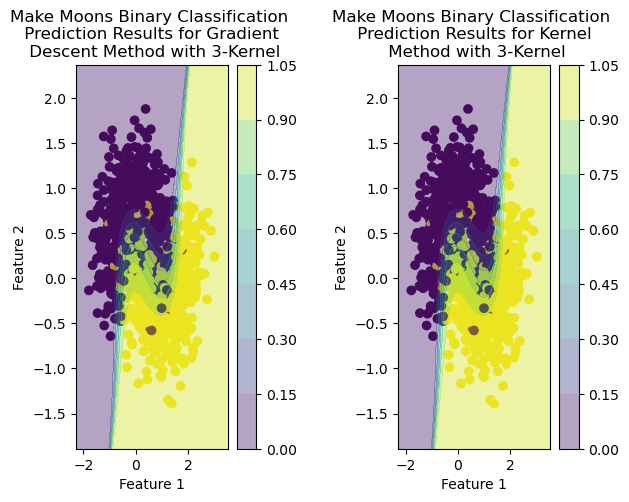

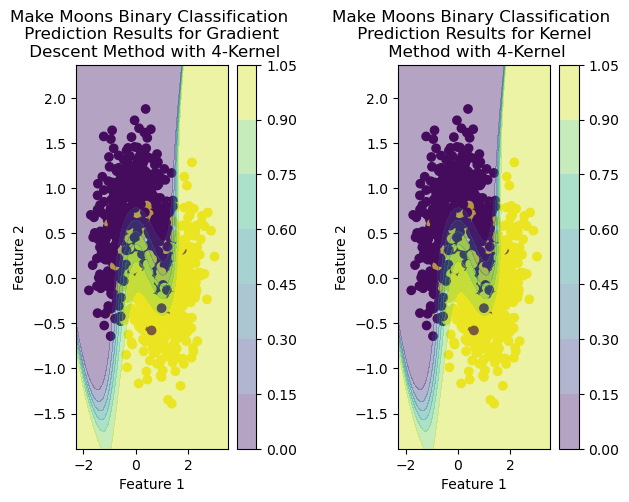

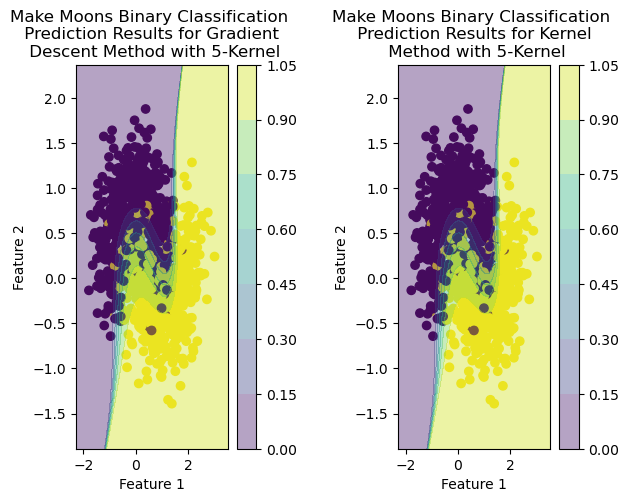

In [12]:
# Create a meshgrid of feature values
#################################
## Make moons
#################################
x_min, x_max = X_moon[:, 0].min() - 0.5, X_moon[:, 0].max() + 0.5
y_min, y_max = X_moon[:, 1].min() - 0.5, X_moon[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

xy = np.vstack((xx.flatten(), yy.flatten())).T
t3 = x_phi(xy, 3)
t4 = x_phi(xy, 4)
t5 = x_phi(xy, 5)

Z3 = p(t3.dot(grad_w3_moon))
Z3 = Z3.reshape(xx.shape)

Z4 = p(t4.dot(grad_w4_moon))
Z4 = Z4.reshape(xx.shape)

Z5 = p(t5.dot(grad_w5_moon))
Z5 = Z5.reshape(xx.shape)

ZZ3 = p(t3.dot(ker_w3_moon))
ZZ3 = ZZ3.reshape(xx.shape)

ZZ4 = p(t4.dot(ker_w4_moon))
ZZ4 = ZZ4.reshape(xx.shape)

ZZ5 = p(t5.dot(ker_w5_moon))
ZZ5 = ZZ5.reshape(xx.shape)


# Plot the prediction results
plt.subplot(1, 2, 1)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon)
plt.contourf(xx, yy, Z3, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Binary Classification \n Prediction Results for Gradient \n Descent Method with 3-Kernel')

plt.subplot(1, 2, 2)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon)
plt.contourf(xx, yy, ZZ3, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Binary Classification \n Prediction Results for Kernel \n Method with 3-Kernel')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)

plt.show()

#################################
plt.subplot(1, 2, 1)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon)
plt.contourf(xx, yy, Z4, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Binary Classification \n Prediction Results for Gradient \n Descent Method with 4-Kernel')

plt.subplot(1, 2, 2)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon)
plt.contourf(xx, yy, ZZ4, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Binary Classification \n Prediction Results for Kernel \n Method with 4-Kernel')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)

plt.show()

#################################
plt.subplot(1, 2, 1)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon)
plt.contourf(xx, yy, Z5, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Binary Classification \n Prediction Results for Gradient \n Descent Method with 5-Kernel')

plt.subplot(1, 2, 2)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c = y_moon)
plt.contourf(xx, yy, ZZ5, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Binary Classification \n Prediction Results for Kernel \n Method with 5-Kernel')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)

plt.show()

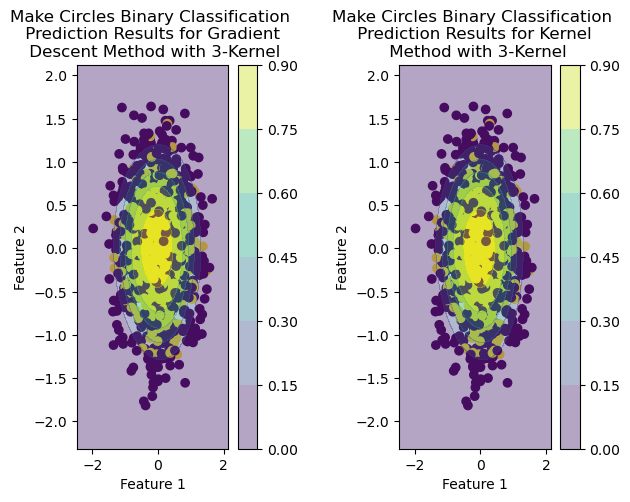

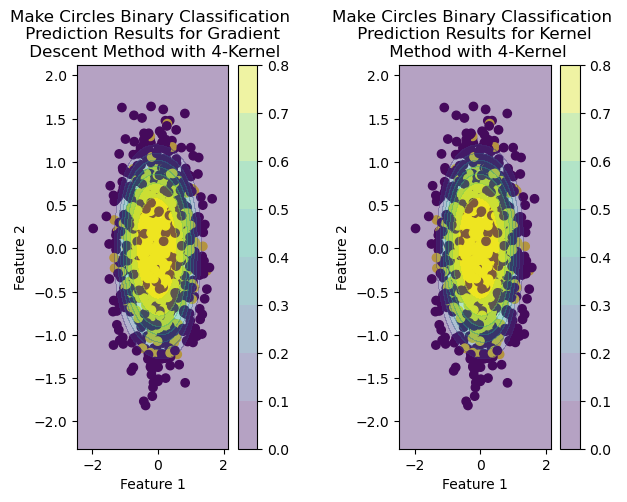

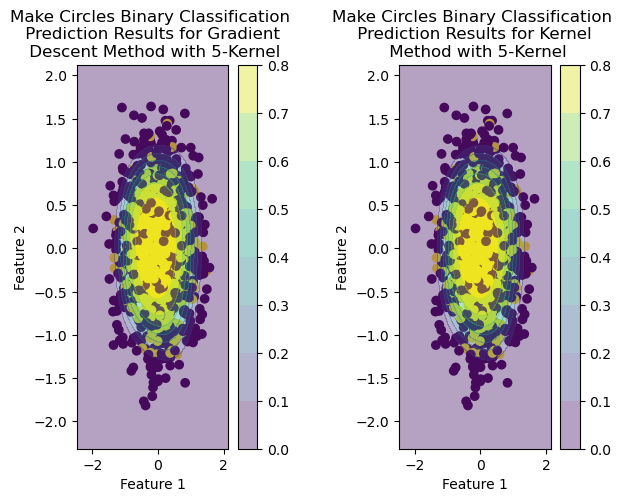

In [13]:
#################################
## Make circles
#################################
x_min, x_max = X_circ[:, 0].min() - 0.5, X_circ[:, 0].max() + 0.5
y_min, y_max = X_circ[:, 1].min() - 0.5, X_circ[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

xy = np.vstack((xx.flatten(), yy.flatten())).T
t3 = x_phi(xy, 3)
t4 = x_phi(xy, 4)
t5 = x_phi(xy, 5)

Z3 = p(t3.dot(grad_w3_circ))
Z3 = Z3.reshape(xx.shape)

Z4 = p(t4.dot(grad_w4_circ))
Z4 = Z4.reshape(xx.shape)

Z5 = p(t5.dot(grad_w5_circ))
Z5 = Z5.reshape(xx.shape)

ZZ3 = p(t3.dot(ker_w3_circ))
ZZ3 = ZZ3.reshape(xx.shape)

ZZ4 = p(t4.dot(ker_w4_circ))
ZZ4 = ZZ4.reshape(xx.shape)

ZZ5 = p(t5.dot(ker_w5_circ))
ZZ5 = ZZ5.reshape(xx.shape)


# Plot the prediction results
plt.subplot(1, 2, 1)
plt.scatter(X_circ[:, 0], X_circ[:, 1], c = y_circ)
plt.contourf(xx, yy, Z3, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Circles Binary Classification \n Prediction Results for Gradient \n Descent Method with 3-Kernel')

plt.subplot(1, 2, 2)
plt.scatter(X_circ[:, 0], X_circ[:, 1], c = y_circ)
plt.contourf(xx, yy, ZZ3, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Circles Binary Classification \n Prediction Results for Kernel \n Method with 3-Kernel')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)

plt.show()

#################################
plt.subplot(1, 2, 1)
plt.scatter(X_circ[:, 0], X_circ[:, 1], c = y_circ)
plt.contourf(xx, yy, Z4, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Circles Binary Classification \n Prediction Results for Gradient \n Descent Method with 4-Kernel')

plt.subplot(1, 2, 2)
plt.scatter(X_circ[:, 0], X_circ[:, 1], c = y_circ)
plt.contourf(xx, yy, ZZ4, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Circles Binary Classification \n Prediction Results for Kernel \n Method with 4-Kernel')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)

plt.show()

#################################
plt.subplot(1, 2, 1)
plt.scatter(X_circ[:, 0], X_circ[:, 1], c = y_circ)
plt.contourf(xx, yy, Z5, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Circles Binary Classification \n Prediction Results for Gradient \n Descent Method with 5-Kernel')

plt.subplot(1, 2, 2)
plt.scatter(X_circ[:, 0], X_circ[:, 1], c = y_circ)
plt.contourf(xx, yy, ZZ5, alpha = 0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Circles Binary Classification \n Prediction Results for Kernel \n Method with 5-Kernel')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)

plt.show()